In [2]:
import pandas as pd 

In [3]:
#he tenido que añadir lo de skip porque no me lo leia (lola)
df = pd.read_csv('brfss2013.csv', encoding='ISO-8859-1')



C:\Users\Usuario\AppData\Local\Temp\ipykernel_21040\4235144204.py:2: DtypeWarning: Columns (11,14,50,53,102,103,104,105,108,111,112,113,118,119,120,121,122,123,125,126,127,130,132,134,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,177,178,179,180,181,182,183,184,185,186,187,188,190,191,192,193,194,195,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,216,226,227,228,229,230,312) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('brfss2013.csv', encoding='ISO-8859-1')


In [4]:
df.columns
df.head()

,X_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,X_psu,ctelenum,...,X_pastae1,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3,X_flshot6,X_pneumo2,X_aidtst3,X_age80
0,Alabama,January,1092013.0,January,9.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,No,60.0
1,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,Yes,50.0
2,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,Yes,55.0
3,Alabama,January,1112013.0,January,11.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,No,64.0
4,Alabama,February,2062013.0,February,6.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,No,No,66.0


In [5]:
sample_number = int(df.shape[0]*0.30)

In [7]:
muestra = df.sample(n=sample_number)

### 1A) SAMPLING 
Hemos decidido hacer stratified sampling para respetar el número de casos en la muestra según el estado de salud. 
Nos quedamos con un 30% de la población total. Así nos aseguramos de que los diferentes subgrupos estén correctamente representados en la muestra. 


In [8]:
from sklearn.model_selection import train_test_split
# Supongamos que 'age_group' y 'gender' son columnas en el conjunto de datos
#remove NA from genhlth
df = df.dropna(subset=['genhlth'])

# Dividir el conjunto de datos en un subconjunto de muestra y otro que no se usará
# stratify=df[genlth] asegura que la muestra sea estratificada
# basándonos en las variables de estratificación especificadas
sample_df, _ = train_test_split(df, test_size=0.7, stratify=df["genhlth"])

# sample_df ahora contiene tu muestra estratificada

In [9]:
sample_df['genhlth'].value_counts()

genhlth
Very good    47723
Good         45166
Excellent    25645
Fair         20018
Poor          8385
Name: count, dtype: int64

### 1B) GENERAL EDA

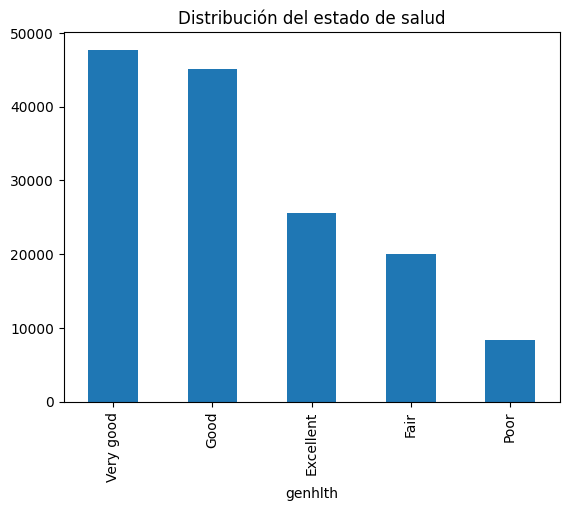

In [11]:
#Histograma según genhtlh
import matplotlib.pyplot as plt
sample_df['genhlth'].value_counts().plot(kind='bar')
plt.title("Distribución del estado de salud")
plt.show()

In [12]:
#Cambiamos el nombre de la columna a dating 
sample_df['marital'] = sample_df['marital'].apply(lambda x: 'Dating' if x == 'A member of an unmarried couple' else x)

In [13]:
sample_df['Health'] = sample_df['genhlth'].apply(lambda x: "Healthy" if x in ['Excellent', 'Very good','Good'] else "Not Healthy")


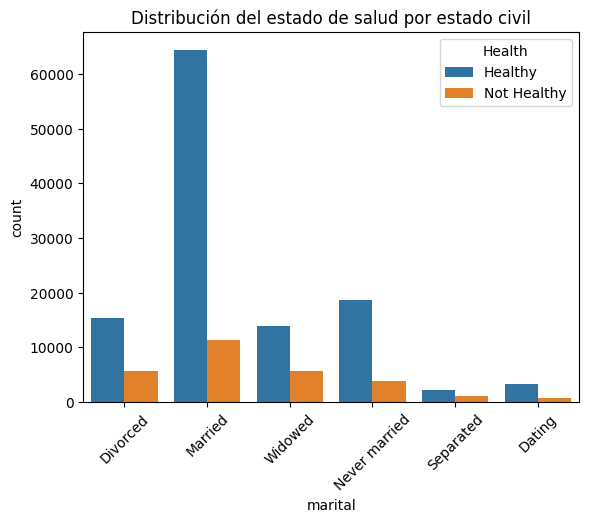

In [14]:

#grafico de barras apliado con marital status y health status 
import seaborn as sns
sns.countplot(x='marital', hue='Health', data=sample_df)
plt.title("Distribución del estado de salud por estado civil")
plt.xticks(rotation=45)
plt.show()


In [15]:
sample_df.columns

Index(['X_state', 'fmonth', 'idate', 'imonth', 'iday', 'iyear', 'dispcode',
       'seqno', 'X_psu', 'ctelenum',
       ...
       'X_lmtact1', 'X_lmtwrk1', 'X_lmtscl1', 'X_rfseat2', 'X_rfseat3',
       'X_flshot6', 'X_pneumo2', 'X_aidtst3', 'X_age80', 'Health'],
      dtype='object', length=331)

In [27]:

sns.countplot(x='mental_health', hue='alcohol', data=sample_df)
plt.title("Distribución del consumo de alcohol por salud mental")
plt.show()


ValueError: Could not interpret value `mental_health` for `x`. An entry with this name does not appear in `data`.

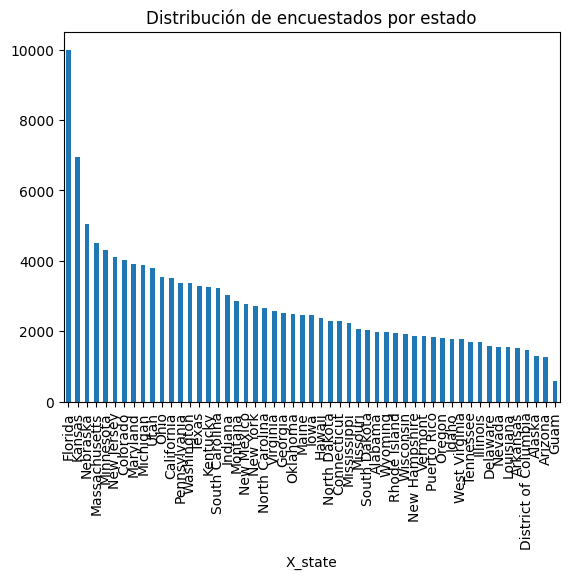

In [17]:
#Distribución del número de encuestados por estado de USA, haz un mapa. En X_state encontrarás el estado.
import plotly.express as px
sample_df['X_state'].value_counts().plot(kind='bar')
plt.title("Distribución de encuestados por estado")
plt.show()


In [18]:
sample_df['sex'].value_counts()

sex
Female    86487
Male      60449
Name: count, dtype: int64

In [19]:
sample_df['income2'].value_counts()

income2
$75,000 or more      34885
Less than $75,000    19534
Less than $50,000    18491
Less than $35,000    14556
Less than $25,000    12347
Less than $20,000    10295
Less than $15,000     8074
Less than $10,000     7652
Name: count, dtype: int64

In [20]:
income_male = sample_df[sample_df['sex'] == 'Male']['income2']

In [21]:
income_male = income_male.value_counts() 

In [22]:
income_female = sample_df[sample_df['sex'] == 'Female']['income2'].value_counts()

In [23]:
type(income_male)

pandas.core.series.Series

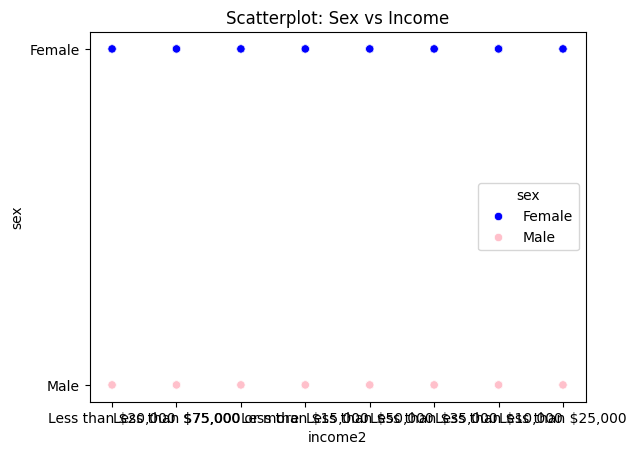

In [24]:
sns.scatterplot(x='income2', y='sex', data=sample_df, hue='sex', palette=['blue', 'pink'])
plt.title("Scatterplot: Sex vs Income")
plt.show()


# APARTADO 2 
### Pregunta 1 - ¿Están los hábitos de fumar de un adulto de EEUU y su grupo de edad asociados con la cantidad de días que informaron que su salud física no era buena?

Variables:
- X_smoker3 --> estatus del fumador con 4 niveles
- X_age_g   --> Edad en 6 grupos 
-  physhlth --> Número de días en el que la salud física no es buena

In [75]:
#quitamos los valores NA de las columnas que vamos a utilziar
df.dropna(subset=['X_smoker3', 'X_age_g', 'physhlth'], inplace=True)

In [99]:
#vemos los valores de la columna X_smoker3
df['X_smoker3'].value_counts()

X_smoker3
Never smoked                             255416
Former smoker                            134532
Current smoker - now smokes every day     53852
Current smoker - now smokes some days     20963
Name: count, dtype: int64

In [100]:
#Cambiamos el nombre de la columna 
sample_df['X_smoker3'] = sample_df['X_smoker3'].apply(lambda x: 'Smokes some days' if x == 'Current smoker - now smokes some days' else x)
sample_df['X_smoker3'] = sample_df['X_smoker3'].apply(lambda x: 'Smokes every day' if x == 'Current smoker - now smokes every day' else x)


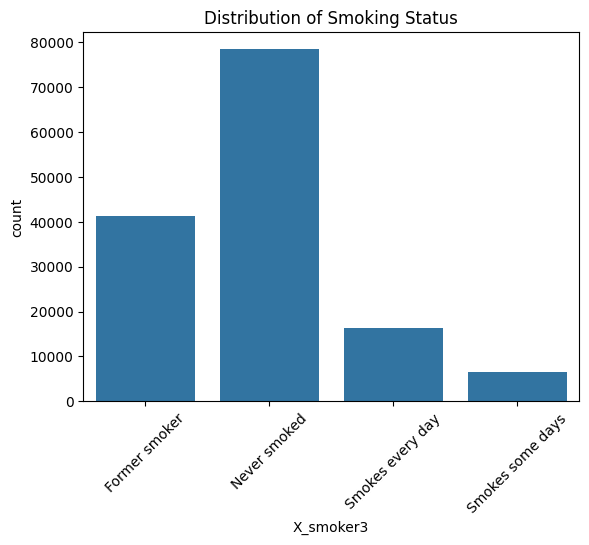

In [101]:
#rotame los titulos de x para que se vean mejor
plt.xticks(rotation=45)
sns.countplot(x='X_smoker3', data=sample_df)
plt.title('Distribution of Smoking Status')
plt.show()

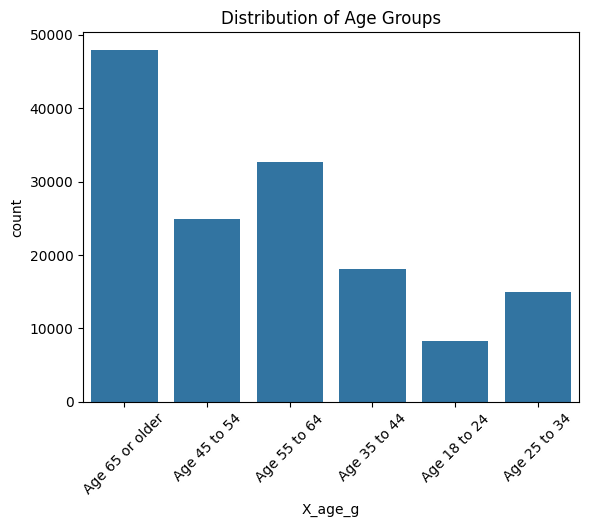

In [105]:
# Distribución de edades
plt.xticks(rotation=45)
sns.countplot(x='X_age_g', data=sample_df)
plt.title('Distribution of Age Groups')
plt.show()


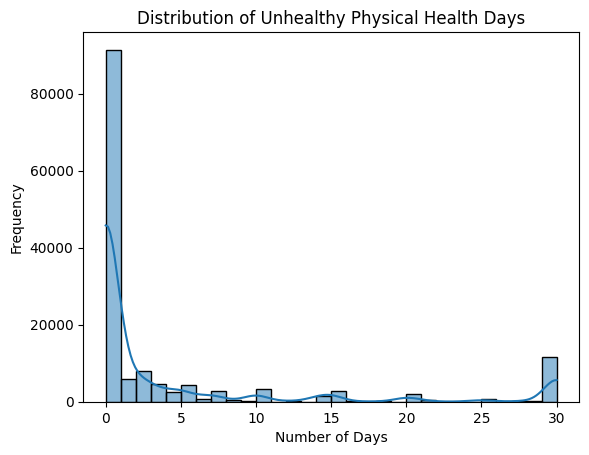

In [106]:
#Distribución de días de mala salud física
sns.histplot(sample_df['physhlth'], bins=30, kde=True)
plt.title('Distribution of Unhealthy Physical Health Days')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()

C:\Users\lolar\AppData\Local\Temp\ipykernel_23172\140750035.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='X_smoker3', y='physhlth', hue='X_age_g', kind='bar', data=sample_df, ci=None)


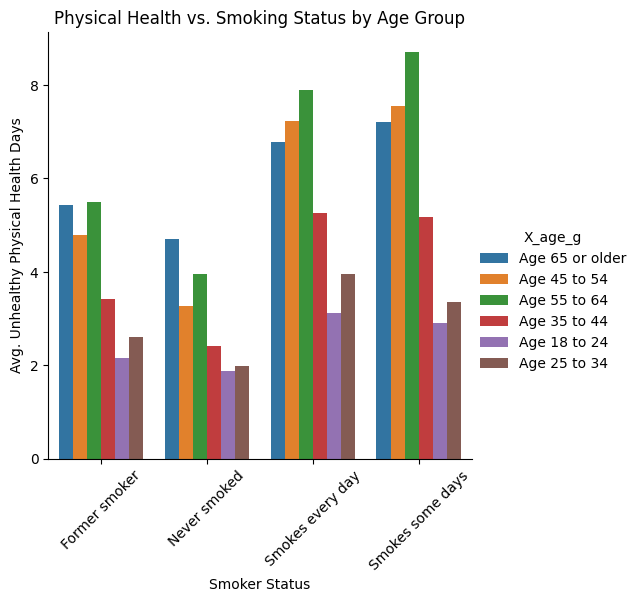

In [112]:
#relacion entre fumar y salud fisica y edad
#rotame el titulo de x para que se vea mejor
sns.catplot(x='X_smoker3', y='physhlth', hue='X_age_g', kind='bar', data=sample_df, ci=None)
plt.xticks(rotation=45)
plt.title('Physical Health vs. Smoking Status by Age Group')
plt.xlabel('Smoker Status')
plt.ylabel('Avg. Unhealthy Physical Health Days')
plt.show()


1. **Distribución del Estado de Fumador**: La primera gráfica muestra que el grupo más grande está son aquellas personas que nunca han fumado, seguido por los exfumadores. Los que fuman todos los días o algunos días representan una menor proporción de la población.

2. **Distribución de Grupos de Edad**: La segunda gráfica muestra que la mayoría de los encuestados están en el grupo de 65 años o más, seguido por el grupo de 55 a 64 años y luego el de 45 a 54 años. Los grupos más jóvenes son menos representativos en el dataset.

3. **Distribución de Días de Salud Física mala**: La tercera gráfica muestra que la mayoría de los encuestados dijeron que habían tenido pocos o ningún día de mala salud física. Hay algunas personas que dijeron todos los días como malos para su salud física, lo que podría indicar una enfermedad crónica o una condición persistente de mala salud.

4. **Salud Física vs. Estado de Fumador por Grupo de Edad**: En la última gráfica, vemos una comparación de los días promedio de mala salud física divididos por estado de fumador y grupo de edad. 


**Parece que aquellos que fuman todos los días o algunos días tienen más días de mala salud física en comparación con los no fumadores y los exfumadores, lo cual indica una asociación entre fumar y peores resultados de salud física. Además, este efecto parece variar con la edad, siendo más pronunciado en ciertos grupos de edad. Por ejemplo, los fumadores diarios en el grupo de 18 a 24 años y de 25 a 34 años reportan más días de mala salud física en promedio en comparación con los no fumadores de su mismo grupo de edad.

Por lo tanto, podemos decir que sí hay una asociación entre los hábitos de fumar de un adulto en EE.UU. y la cantidad de días que informaron que su salud física no era buena, y que esta asociación también está influenciada por el grupo de edad. Los efectos del tabaco en la salud física pueden ser más inmediatos en los fumadores más jóvenes o que los fumadores mayores han dejado de fumar.


In [116]:
import numpy as np
from scipy.stats import chi2_contingency
df['physhlth_cat'] = np.where(df['physhlth'] > df['physhlth'].median(), 'High', 'Low')

contingency_table = pd.crosstab(df['X_smoker3'], df['physhlth_cat'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test:\nChi2 value: {chi2}\nP-value: {p}\nDegrees of Freedom: {dof}')

Chi-Square Test:
Chi2 value: 2869.5060762947833
P-value: 0.0
Degrees of Freedom: 3


Vemos la relación entre `X_smoker3` y `physhlth_cat`, que hemos dividido en dos niveles: "High" y "Low",

1. **Valor de Chi-Cuadrado**: Tenemos un valor muy alto, es el nivel de asociación entre variables.  

2. **P-value**: Tenemos un p bajo nulo indicando que es improbable que la asociación observada se deba al azar, y por lo tanto, rechazamos la hipótesis nula de independencia entre las variables.

3. **Grados de libertad**: (número de filas en la tabla - 1) x (número de columnas en la tabla de - 1). 4 -1  estados de fumador x 2 -1  categorías de salud física 


Los resultados sugieren que hay una relación significativa entre ser fumador y reportar más días de mala salud física. Sin embargo, la prueba no te dice nada sobre la fuerza de esta asociación ni sobre la dirección de la misma 

### Pregunta 2 - ¿Está el acceso a la atención médica asociado con la prevalencia de diabetes y enfermedad cardiovascular en adultos de Estados Unidos?
Variables:

- Health_Plan (Acceso a la atención médica) - obtenida de la columna hlthpln1
- Diabetes (Prevalencia de diabetes) - obtenida de la columna diabete3
- Cardiovascular_Disease (Prevalencia de enfermedad cardiovascular) - obtenida de la columna cvdcrhd4

Hipótesis:

* H0 (Hipótesis Nula): No hay asociación entre el acceso a la atención médica y la prevalencia de la diabetes o enfermedad cardiovascular.
* H1 (Hipótesis Alternativa): Existe una asociación entre el acceso a la atención médica y la prevalencia de la diabetes o enfermedad cardiovascular.

Visualizaciones de los datos previas al análisis estadístico: 

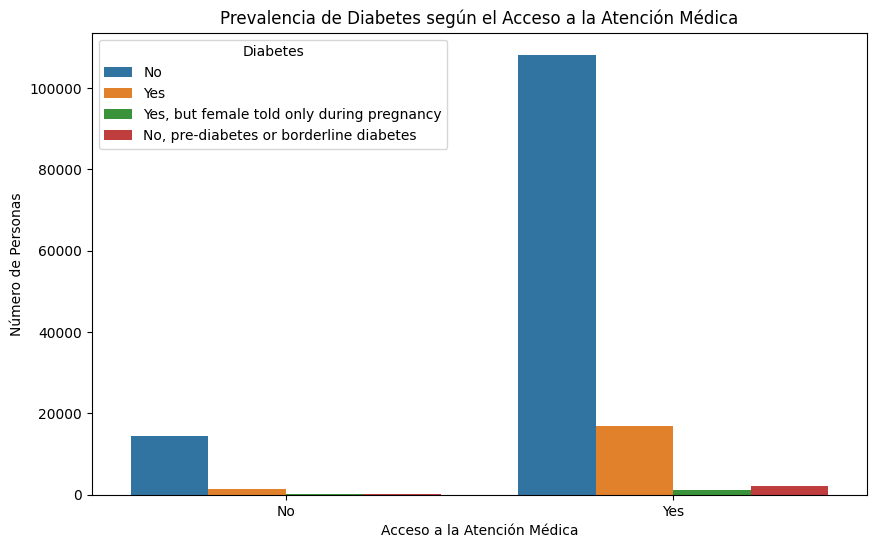

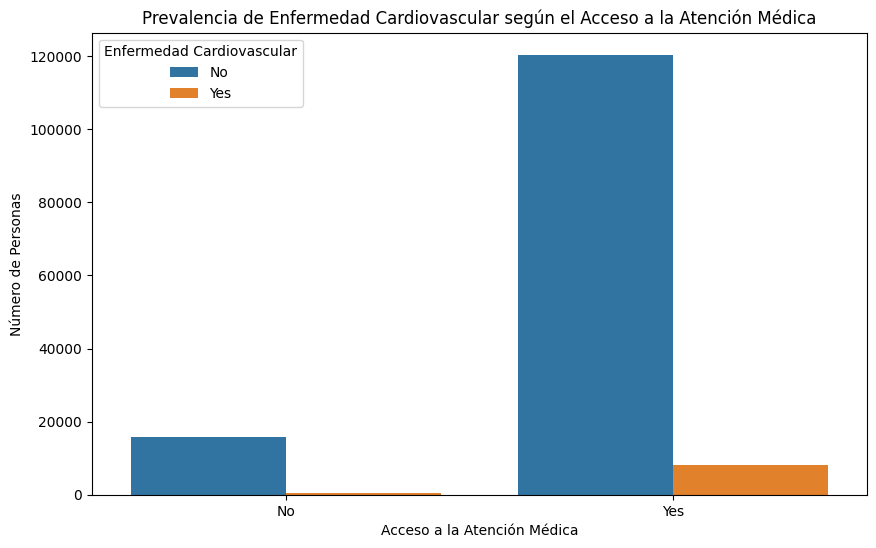

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas relevantes y renombrarlas
data_subset = sample_df[['hlthpln1', 'diabete3', 'cvdcrhd4']].copy()  # Crear una copia para evitar el SettingWithCopyWarning
data_subset.columns = ['Health_Plan', 'Diabetes', 'Cardiovascular_Disease']

# Reemplazar códigos numéricos con etiquetas descriptivas
data_subset.loc[:, 'Health_Plan'] = data_subset['Health_Plan'].replace({1: 'Sí', 2: 'No'})
data_subset.loc[:, 'Diabetes'] = data_subset['Diabetes'].replace({1: 'Sí', 2: 'No', 3: 'Sí, pero prediabetes', 4: 'No lo sé'})
data_subset.loc[:, 'Cardiovascular_Disease'] = data_subset['Cardiovascular_Disease'].replace({1: 'Sí', 2: 'No', 7: 'No lo sé', 9: 'No responde'})

# Eliminar filas con valores perdidos
data_subset = data_subset.dropna()

# Visualización de la prevalencia de enfermedades crónicas según el acceso a la atención médica
plt.figure(figsize=(10, 6))
sns.countplot(data=data_subset, x='Health_Plan', hue='Diabetes')
plt.title('Prevalencia de Diabetes según el Acceso a la Atención Médica')
plt.xlabel('Acceso a la Atención Médica')
plt.ylabel('Número de Personas')
plt.legend(title='Diabetes')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data_subset, x='Health_Plan', hue='Cardiovascular_Disease')
plt.title('Prevalencia de Enfermedad Cardiovascular según el Acceso a la Atención Médica')
plt.xlabel('Acceso a la Atención Médica')
plt.ylabel('Número de Personas')
plt.legend(title='Enfermedad Cardiovascular')
plt.show()


Análisis estadístico, prueba chi-cuadrado: 

In [15]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para la prevalencia de diabetes y acceso a la atención médica
diabetes_health_plan_contingency = pd.crosstab(data_subset['Health_Plan'], data_subset['Diabetes'])

# Tabla de contingencia para la prevalencia de enfermedad cardiovascular y acceso a la atención médica
cvd_health_plan_contingency = pd.crosstab(data_subset['Health_Plan'], data_subset['Cardiovascular_Disease'])

# Prueba de chi-cuadrado para la prevalencia de diabetes y acceso a la atención médica
chi2_diabetes, p_diabetes, _, _ = chi2_contingency(diabetes_health_plan_contingency)
print("Diabetes Prevalence:")
print("Chi-square statistic:", chi2_diabetes)
print("p-value:", p_diabetes)

# Prueba de chi-cuadrado para la prevalencia de enfermedad cardiovascular y acceso a la atención médica
chi2_cvd, p_cvd, _, _ = chi2_contingency(cvd_health_plan_contingency)
print("\nCardiovascular Disease Prevalence:")
print("Chi-square statistic:", chi2_cvd)
print("p-value:", p_cvd)


Diabetes Prevalence:
Chi-square statistic: 355.1110978238591
p-value: 1.1666616382698697e-76

Cardiovascular Disease Prevalence:
Chi-square statistic: 341.58521613152504
p-value: 2.881648866881962e-76


#### Comentarios: 
Hemos utilizado la prueba de chi-cuadrado en lugar de otras pruebas, como la prueba t de Student o la prueba exacta de Fisher, debido a que estamos analizando la asociación entre variables categóricas y la prueba de chi-cuadrado es adecuada para este tipo de análisis.

##### Resultados:

PRIMERO: Prevalencia de Diabetes:

- Estadístico de Chi-cuadrado: 355.11
- Valor p: 1.17e-76 (prácticamente cero)
- Comentarios: El valor p extremadamente pequeño proporciona evidencia fuerte en contra de la hipótesis nula. Indica una asociación significativa entre el acceso a la atención médica y la prevalencia de la diabetes. Por lo tanto, rechazamos la hipótesis nula y concluimos que el acceso a la atención médica está asociado con la prevalencia de la diabetes.


SEGUNDO: Prevalencia de Enfermedad Cardiovascular:

- Estadístico de Chi-cuadrado: 341.59
- Valor p: 2.88e-76 (prácticamente cero)
- Comentarios: Al igual que en el caso de la diabetes, el valor p extremadamente pequeño proporciona evidencia fuerte en contra de la hipótesis nula. Indica una asociación significativa entre el acceso a la atención médica y la prevalencia de enfermedades cardiovasculares. Por lo tanto, rechazamos la hipótesis nula y concluimos que el acceso a la atención médica está asociado con la prevalencia de enfermedades cardiovasculares.

### Pregunta 3- ¿Está el nivel de ingreso asociado con el Índice de Masa Corporal (IMC) en adultos de Estados Unidos? 
Variables:
- Income (Nivel de ingreso) - obtenida de la columna income2
- BMI (Índice de Masa Corporal) - obtenida de la columna X_bmi5

Hipótesis: 
- H0 (Hipótesis Nula): No hay diferencia en el IMC promedio entre diferentes niveles de ingreso.
- H1 (Hipótesis Alternativa): Existe una diferencia en el IMC promedio entre diferentes niveles de ingreso.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Seleccionar columnas relevantes
relevant_columns = ['income2', 'X_bmi5']
data_subset = sample_df[relevant_columns]

In [31]:
data_subset["income2"]

5873      Less than $10,000
47459     Less than $35,000
386623    Less than $20,000
170140    Less than $75,000
64857     Less than $50,000
                ...        
349418    Less than $75,000
204891    Less than $20,000
177419    Less than $50,000
15577     Less than $25,000
387869    Less than $35,000
Name: income2, Length: 146937, dtype: object

In [47]:
#corret and divide X_bmi5 variable by 100
data_subset['X_bmi5'] = data_subset['X_bmi5'] / 100   
 
# Renombrar columnas para mayor claridad
data_subset.columns = ['Income', 'BMI']

# Eliminar filas con valores faltantes
data_subset = data_subset.dropna()

# Convertir los códigos de ingreso a etiquetas descriptivas
income_mapping = {
     'Less than $15,000': 2,
     'Less than $20,000': 3,
     'Less than $10,000': 1,
     'Less than $25,000': 4,
     'Less than $35,000': 5,
     'Less than $50,000': 6,
     'Less than $75,000': 7,
     '$75,000 or more' :8 
}
data_subset['Income_codes'] = data_subset['Income'].map(income_mapping)

C:\Users\beatr\AppData\Local\Temp\ipykernel_27216\3670587237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['X_bmi5'] = data_subset['X_bmi5'] / 100


In [48]:
data_subset.head()

,Income,BMI,Income_codes
5873,"Less than $10,000",24.96,1
47459,"Less than $35,000",24.80,5
386623,"Less than $20,000",23.83,3
170140,"Less than $75,000",29.86,7
64857,"Less than $50,000",24.03,6


VISUALIZACIONES: 

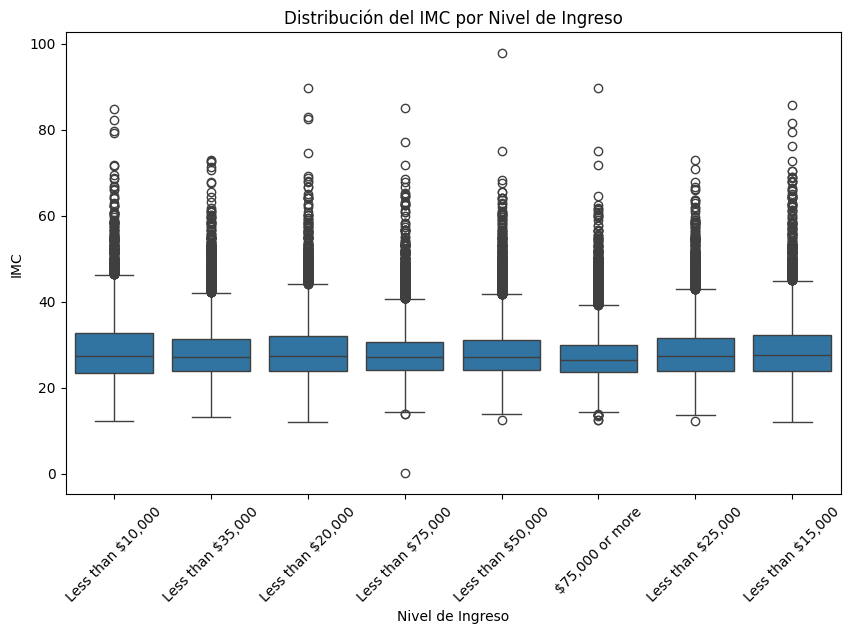

In [49]:

# Visualización: Diagrama de caja del IMC para cada nivel de ingreso
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_subset, x='Income', y='BMI')
plt.title('Distribución del IMC por Nivel de Ingreso')
plt.xlabel('Nivel de Ingreso')
plt.ylabel('IMC')
plt.xticks(rotation=45)
plt.show()

ANÁLISIS ESTADÍSTICO

In [50]:
# ANOVA
income_groups = [group['BMI'] for name, group in data_subset.groupby('Income_codes')]
f_statistic, p_value = f_oneway(*income_groups)
print("Análisis de Varianza (ANOVA) para IMC por Nivel de Ingreso:")
print("Valor F:", f_statistic)
print("Valor p:", p_value)

Análisis de Varianza (ANOVA) para IMC por Nivel de Ingreso:
Valor F: 147.85840744350847
Valor p: 2.9126482250849774e-218


##### Comentarios y Resultados 
El Análisis de Varianza (ANOVA) es una técnica estadística utilizada para comparar las medias de tres o más grupos para determinar si al menos uno de los grupos difiere significativamente de los demás en términos de su variable dependiente.
- Determina si hay diferencias significativas entre las medias de varios grupos.

Sobre los resultados obtenidos: 
- El valor F es una medida de la variación entre grupos en relación con la variación dentro de los grupos. En este caso, el valor F es bastante grande, lo que indica que la variación entre los diferentes niveles de ingreso es significativamente mayor que la variación dentro de los mismos grupos.

- El valor p asociado al estadístico F es extremadamente pequeño (aproximadamente 0), lo que sugiere que hay diferencias significativas en el IMC promedio entre los diferentes niveles de ingreso. Por lo tanto, podemos rechazar la hipótesis nula y concluir que al menos uno de los grupos de ingresos tiene un IMC promedio significativamente diferente de los demás.

### Pregunta 4- ¿Existe una asociación entre el Índice de Masa Corporal (IMC) y haber experimentado un ataque al corazón en adultos de Estados Unidos?
Variables:
- Haber tenido un infarto - obtenida de la columna cvdinfr4
- BMI (Índice de Masa Corporal) - obtenida de la columna X_bmi5

Hipótesis: 
- H0 (Hipótesis Nula): No hay diferencia en el IMC entre aquellos que han tenido un ataque al corazón y aquellos que no lo han tenido.
- H1 (Hipótesis Alternativa): Existe una diferencia en el IMC entre aquellos que han tenido un ataque al corazón y aquellos que no lo han tenido.

In [51]:
sample_df['cvdinfr4'].value_counts()

No     137396
Yes      8754
Name: cvdinfr4, dtype: int64

In [54]:
relevant_columns = ['X_bmi5', 'cvdinfr4'] 
data_subset = sample_df[relevant_columns].dropna()  

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

bmi_with_heart_attack = data_subset[data_subset['cvdinfr4'] == 'Yes']['X_bmi5']
bmi_without_heart_attack = data_subset[data_subset['cvdinfr4'] == 'No']['X_bmi5']




VISUALIZACIÓN 

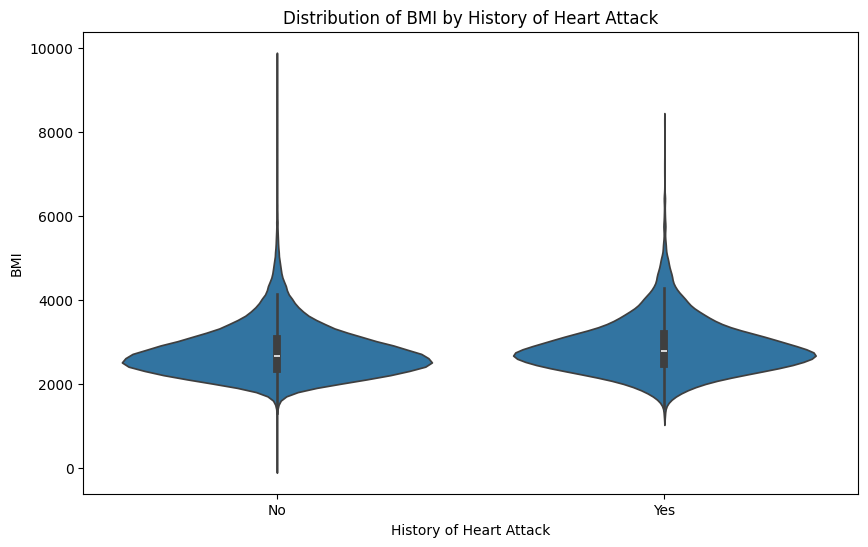

In [58]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cvdinfr4', y='X_bmi5', data=data_subset)
plt.title('Distribution of BMI by History of Heart Attack')
plt.xlabel('History of Heart Attack')
plt.ylabel('BMI')
plt.show()

ANÁLISIS ESTADÍSTICO 

In [56]:

t_statistic, p_value = ttest_ind(bmi_with_heart_attack, bmi_without_heart_attack)

# Print the test results
print("T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-test Results:
T-statistic: 15.57374060253148
P-value: 1.222084629353042e-54


##### Comentario de resultados: 

- T-statistic: El valor del estadístico t es aproximadamente 15.57.
- P-value: El valor p es extremadamente pequeño, alrededor de 1.22e-54.
Comentario:

El valor tan bajo del valor p (prácticamente cero) indica una evidencia significativa en contra de la hipótesis nula. En este caso, la hipótesis nula sería que no hay diferencia en el IMC entre aquellos que han tenido un ataque al corazón y aquellos que no lo han tenido. Dado que el valor p es tan pequeño, concluimos que hay una diferencia significativa en los IMC entre estos dos grupos. Por lo tanto, podemos rechazar la hipótesis nula y concluir que hay una asociación significativa entre el IMC y haber tenido un ataque al corazón.

### Pregunta 5 - ¿Existe relación entre el consumo de alcohol y la salud mental?
Variables:

- Mental_Health (Número de días que los encuestados tuvieron problemas de salud mental en el último mes) - obtenida de la columna menthlth
- Alcohol (Numero de dias que los ecuestados tomaron alcohol en el último mes) - obtenida de la columna alcday5

Creamos dos variables categóricas a partir de las variables originales para poder realizar el análisis estadístico.

- Mental_Health_Cat: "Yes" si el número de días con problemas de salud mental es mayor que 1, "No" en caso contrario.

- Alcohol_Cat: "Yes" si el número de días de consumo de alcohol es mayor que 1, "No" en caso contrario.

Hipótesis: 
- H0 (Hipótesis Nula): No hay diferencia en la salud mental entre aquellos que han consumido alcohol y aquellos que no.
- H1 (Hipótesis Alternativa): Existe una diferencia en la salud mental entre los que han consumido alcohol y los que no.

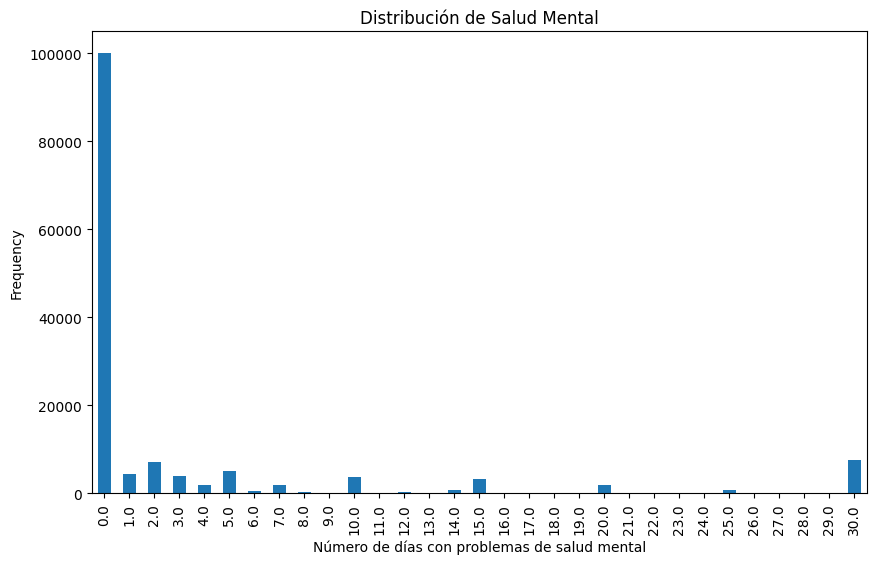

In [35]:
# visualizamos la distribución de mental_health 

sample_df["menthlth"].value_counts()

# plot 

plt.figure(figsize=(10, 6))
sample_df["menthlth"].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Salud Mental')
plt.xlabel('Número de días con problemas de salud mental')
plt.ylabel('Frequency')
plt.show()


In [32]:
# crear una variable nueva mental_health_cat que sea True si menthlth > 1 y False en otro caso

sample_df["mental_health_cat"] = sample_df["menthlth"] > 1
sample_df["mental_health_cat"].value_counts()


mental_health_cat
False    106965
True      39972
Name: count, dtype: int64

In [33]:
sample_df["alcohol_cat"] = sample_df["alcday5"] > 1
sample_df["alcohol_cat"].value_counts()

alcohol_cat
False    76423
True     70514
Name: count, dtype: int64

Análálisis estadístico

In [34]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(sample_df["mental_health_cat"], sample_df["alcohol_cat"])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("alcohol influence on mentl health: ")
print("Chi-Square Test:", chi2)
print("P-value:", p)

alcohol influence on mentl health: 
Chi-Square Test: 6.318965856587327
P-value: 0.011945327427960426


#### Conclusiones
Utilizamos la prueba de chi-cuadrado para analizar asociaciones entre variables catégoricas.

Hemos obtenido los siguientes resultados:

- Estadístico de chi-cuadrado: 6.32
- P-valor: 0.01

Dado que el p-valor es menor que el nivel de significancia típico de 0.05, hay evidencia para rechazar la hipótesis nula. Por lo tanto, concluimos que hay una asociación significativa entre el consumo de alcohol y la salud mental. En este caso, aquellos que consumen alcohol tienen más probabilidades de tener problemas de salud mental en comparación con aquellos que no consumen alcohol.